# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv',low_memory=False)
test=pd.read_csv('test.csv',low_memory=False)
store=pd.read_csv('store.csv',low_memory=False)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)
#train data miss nadarad

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [4]:
missing_percentage = (store.isnull().sum() / len(store)) * 100
print(missing_percentage)
#train data miss nadarad

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


In [5]:
threshold=len(store)*0.6
store=store.dropna(thresh=threshold,axis=1)
store.head()
#sotoon ha ba bish az 40% Na ra hazf mikonim

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,1270.0,9.0,2008.0,0
1,2,a,a,570.0,11.0,2007.0,1
2,3,a,a,14130.0,12.0,2006.0,1
3,4,c,c,620.0,9.0,2009.0,0
4,5,a,a,29910.0,4.0,2015.0,0


In [6]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

In [7]:
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(1)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(1900)
#store.csv clean shod

In [8]:
missing_percentage = (test.isnull().sum() / len(test)) * 100
print(missing_percentage)

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64


In [9]:
test['Open'] = test['Open'].fillna(1)
#test.csv clean shod

In [10]:
#train va store ra dar ham join mikonim
train_store= pd.merge(train,store, on='Store',how='left')

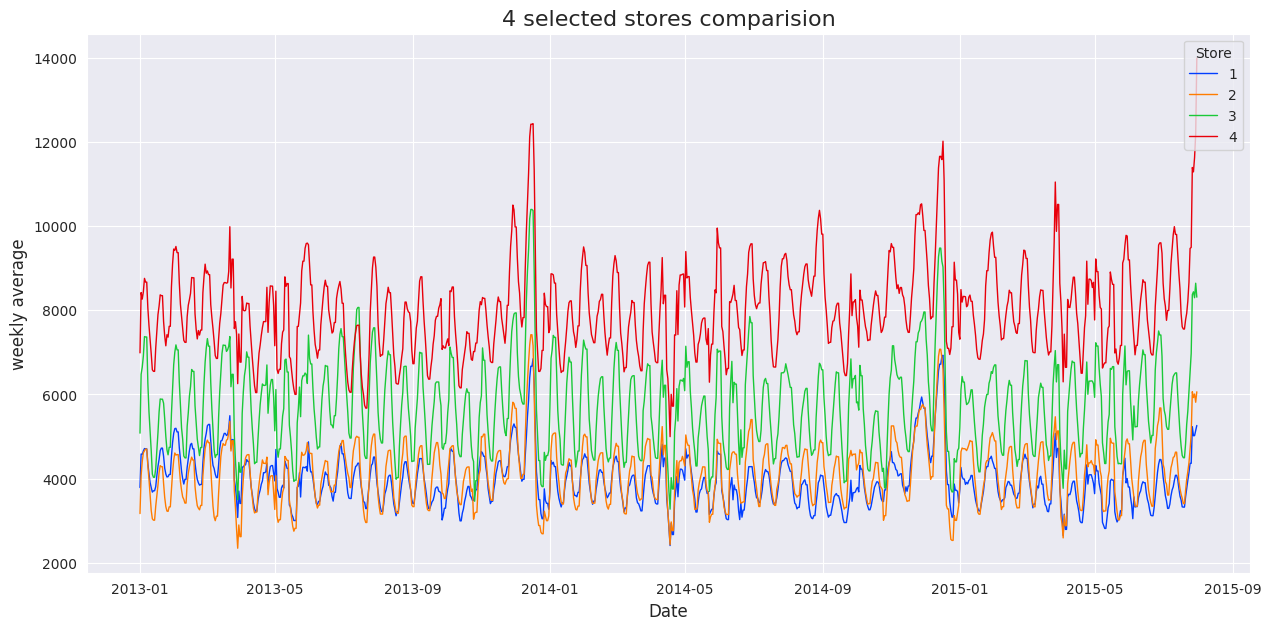

In [11]:
#train['Sales_week'] = train['Sales'].rolling(window=7).mean()
#تغییر
train['Sales_week'] = train.groupby('Store')['Sales'] \
    .transform(lambda x: x.rolling(7).mean())

train['Date'] = pd.to_datetime(train['Date'])
selected_stores = [1, 2, 3, 4]
train_subset = train[train['Store'].isin(selected_stores)].copy()
train_subset['Sales_MA7'] = train_subset.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")
plot = sns.lineplot(data=train_subset, x='Date', y='Sales_MA7', hue='Store', palette='bright', linewidth=1)
plt.title('4 selected stores comparision', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel(('weekly average'), fontsize=12)
plt.legend(title='Store', loc='upper right')
plt.show()

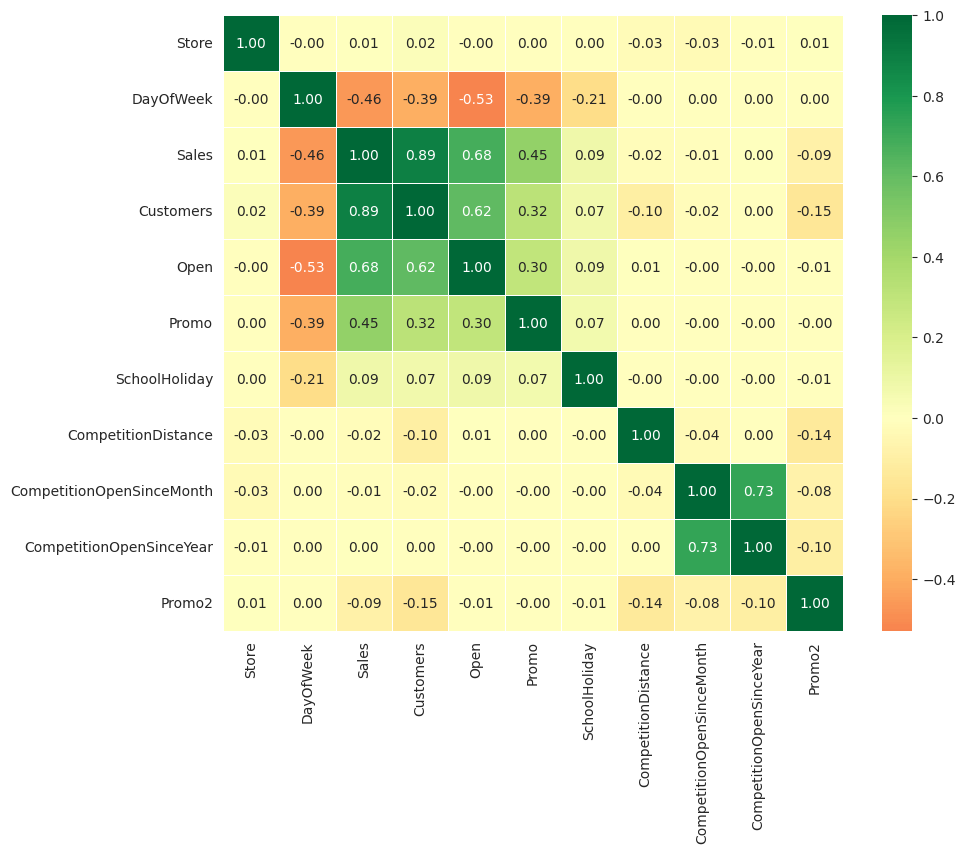

In [12]:
hambastegi= train_store.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(hambastegi, annot=True,fmt=".2f",cmap='RdYlGn',linewidths=0.5,center=0)
plt.show()

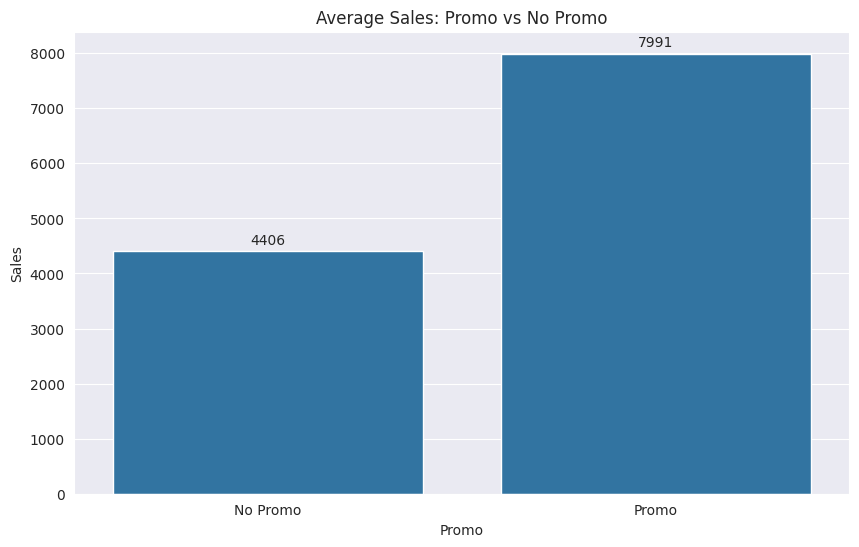

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Promo', y='Sales', data=train_store, errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.title('Average Sales: Promo vs No Promo')
plt.show()

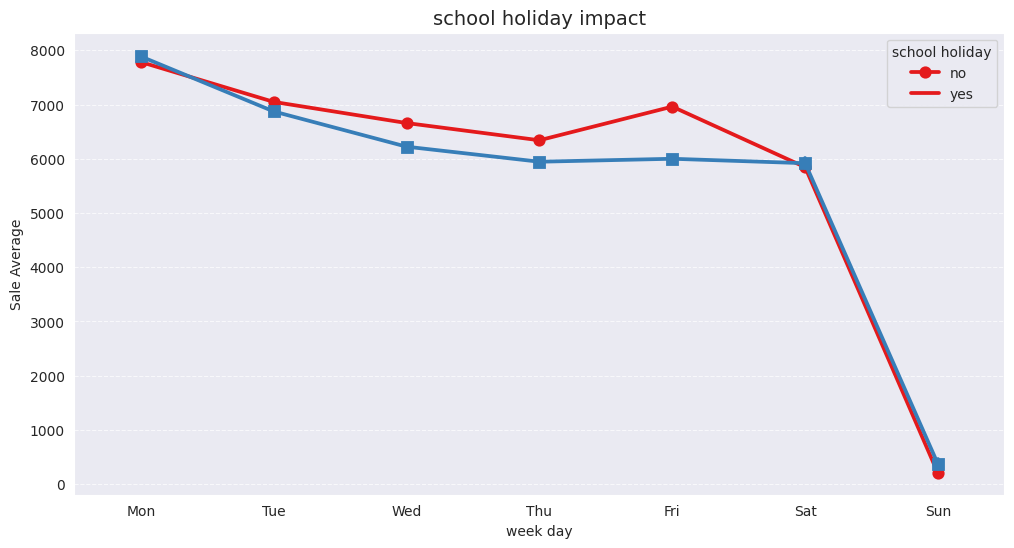

In [14]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='DayOfWeek', y='Sales', hue='SchoolHoliday', data=train_store, palette='Set1', markers=['o', 's'])
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('school holiday impact', fontsize=14)
plt.xlabel('week day')
plt.ylabel('Sale Average')
plt.legend(title='school holiday', labels=['no', 'yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

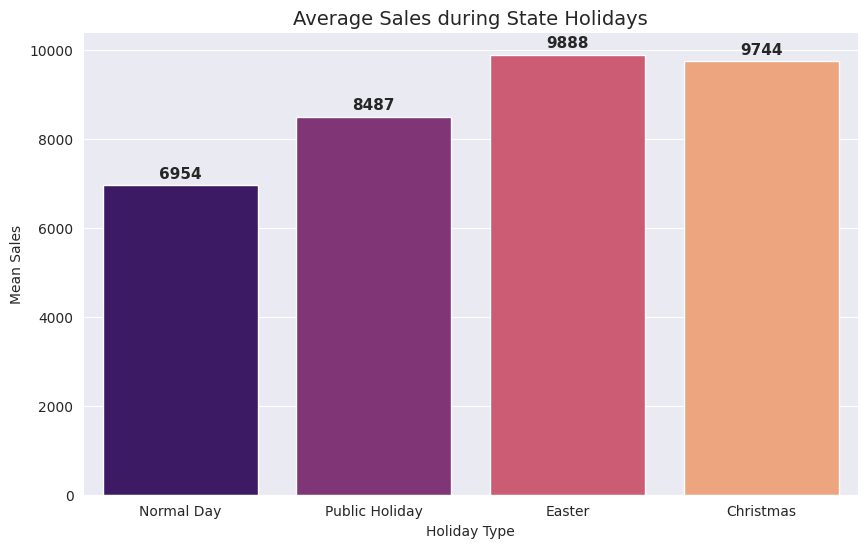

In [15]:
train_store['StateHoliday'] = train_store['StateHoliday'].astype(str)
open_stores = train_store[train_store['Open'] == 1]
holiday_impact = open_stores.groupby('StateHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='StateHoliday', 
    y='Sales', 
    data=holiday_impact, 
    hue='StateHoliday',
    palette='magma', 
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=11, fontweight='bold')
plt.xticks([0, 1, 2, 3], ['Normal Day', 'Public Holiday', 'Easter', 'Christmas'])
plt.title('Average Sales during State Holidays', fontsize=14)
plt.ylabel('Mean Sales')
plt.xlabel('Holiday Type')

sns.despine()
plt.show()

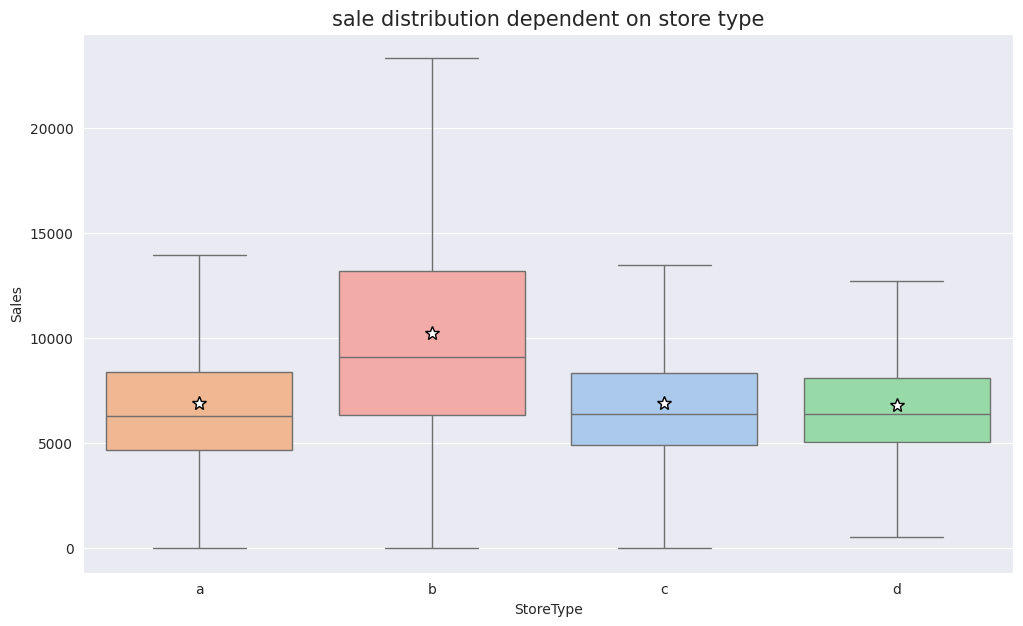

In [16]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='StoreType', y='Sales', data=open_stores, 
                 order=['a', 'b', 'c', 'd'], 
                 hue='StoreType',
                 palette='pastel',
                 legend=False,
                 showfliers=False,
                 showmeans=True,
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title(('sale distribution dependent on store type'), fontsize=15)
plt.show()

In [17]:
#sakhte vijegi haye jadid
train_store['Date']=pd.to_datetime(train_store['Date'])
train_store['year']=train_store['Date'].dt.year
train_store['month']=train_store['Date'].dt.month
train_store['Day']=train_store['Date'].dt.day
train_store['season'] = train_store['month'] % 12 // 3 + 1
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week.astype(int)
train_store['IsAnyHoliday'] = ((train_store['StateHoliday'] != '0') | (train_store['SchoolHoliday'] == 1)).astype(int)
train_store = train_store.sort_values(['Store', 'Date'])
train_store['MovingAvg_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(1)
)
train_store['MovingAvg_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).mean().shift(1)
)


In [18]:
train_store['MovingAvg_7'].isnull().sum()

np.int64(7805)

In [19]:
train_store['MovingAvg_7'] = train_store['MovingAvg_7'].bfill()
train_store['MovingAvg_30'] = train_store['MovingAvg_30'].bfill()

In [20]:
#lag features
train_store = train_store.sort_values(['Store', 'Date'])
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales'].shift(1)
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales_yesterday'].bfill()
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(7)
)
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales_MA7_Lag7'].transform(lambda x: x.bfill())
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).std().shift(1)
)
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).std().shift(1)
)
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales_Std_7'].transform(lambda x: x.bfill())
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales_Std_30'].transform(lambda x: x.bfill())

In [21]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  str           
 10  Assortment                 1017209 non-null  str           
 11  CompetitionDistance        1017209 non-null  float

In [22]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Day,season,WeekOfYear,IsAnyHoliday,MovingAvg_7,MovingAvg_30,Sales_yesterday,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,...,1,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1014980,1,3,2013-01-02,5530,668,1,0,0,1,c,...,2,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1013865,1,4,2013-01-03,4327,578,1,0,0,1,c,...,3,1,1,1,3788.0,4124.066667,5530.0,3788.0,2752.283961,2006.107415
1012750,1,5,2013-01-04,4486,619,1,0,0,1,c,...,4,1,1,1,3788.0,4124.066667,4327.0,3788.0,2752.283961,2006.107415
1011635,1,6,2013-01-05,4997,635,1,0,0,1,c,...,5,1,1,1,3788.0,4124.066667,4486.0,3788.0,2752.283961,2006.107415


In [23]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  str           
 10  Assortment                 1017209 non-null  str           
 11  CompetitionDistance        1017209 non-null  float

In [24]:
#fourier terms
day_of_year = train_store['Date'].dt.dayofyear
total_days = 365.25
for i in range(1, 4):
    train_store[f'fourier_sin_{i}'] = np.sin(2 * np.pi * i * day_of_year / total_days)
    train_store[f'fourier_cos_{i}'] = np.cos(2 * np.pi * i * day_of_year / total_days)

In [25]:
#holiday distance
holiday_dates = sorted(train_store[train_store['StateHoliday'] != '0']['Date'].unique())
def days_until_next_holiday(current_date):
    idx = np.searchsorted(holiday_dates, current_date)
    if idx < len(holiday_dates):
        return (holiday_dates[idx] - current_date).days
    else:
        return 0
train_store['DaysToHoliday'] = train_store['Date'].apply(days_until_next_holiday)

In [26]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3,DaysToHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,...,3788.0,2752.283961,2006.107415,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1014980,1,3,2013-01-02,5530,668,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.034398,0.999408,0.068755,0.997634,0.103031,0.994678,4
1013865,1,4,2013-01-03,4327,578,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.051584,0.998669,0.103031,0.994678,0.154204,0.988039,3
1012750,1,5,2013-01-04,4486,619,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.068755,0.997634,0.137185,0.990545,0.204966,0.978769,2
1011635,1,6,2013-01-05,4997,635,1,0,0,1,c,...,3788.0,2752.283961,2006.107415,0.085906,0.996303,0.171177,0.985240,0.255182,0.966893,1


In [27]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
Day                          0
season                       0
WeekOfYear                   0
IsAnyHoliday                 0
MovingAvg_7                  0
MovingAvg_30                 0
Sales_yesterday              0
Sales_MA7_Lag7               0
Sales_Std_7                  0
Sales_Std_30                 0
fourier_sin_1                0
fourier_cos_1                0
fourier_sin_2                0
fourier_cos_2                0
fourier_sin_3                0
fourier_

In [28]:
#time based split
train_store= train_store.sort_values('Date')
last_date=train_store['Date'].max()
split_date= last_date-pd.Timedelta(days=42)
train_data= train_store[train_store['Date']<=split_date]
valid_data= train_store[train_store['Date']>split_date]
print(len(train_data))
print(len(valid_data))

970379
46830


## PHASE 3

Baseline RMSE: 3102.1423
Linear Regression RMSE: 1227.3211
XGBoost RMSE: 638.3928
Store-Aware CV RMSE: 538.8356


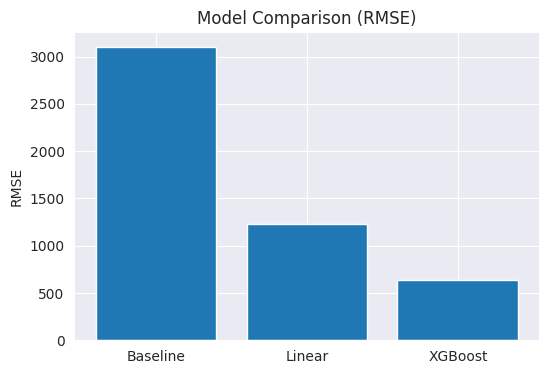

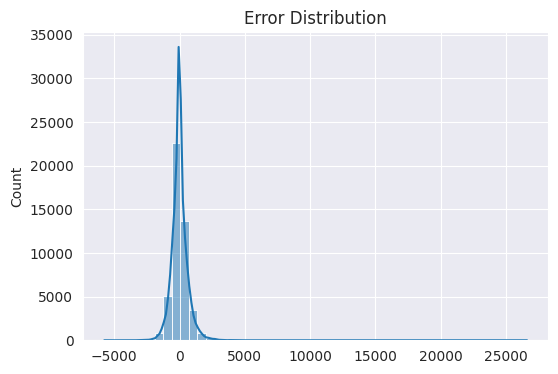

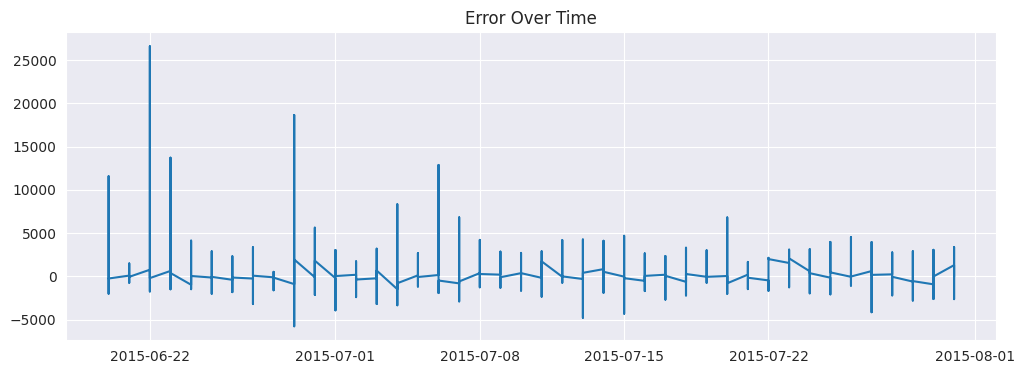


Top 20 Worst Predictions:
            Date  Store  Sales    Prediction         Error
44393 2015-06-22    909  41551  14936.173828  26614.826172
35971 2015-06-29    292  29161  10499.559570  18661.440430
43278 2015-06-23    909  30038  16308.474609  13729.525391
28750 2015-07-06    876  27330  14441.214844  12888.785156
46623 2015-06-20    909  22882  11301.405273  11580.594727
30980 2015-07-04    876  14708   6367.567871   8340.432129
27635 2015-07-07    876  23927  17101.273438   6825.726562
13173 2015-07-20    909  23081  16265.353516   6815.646484
36588 2015-06-29    909   6125  11891.777344  -5766.777344
35320 2015-06-30    756  29007  23369.890625   5637.109375
34856 2015-06-30    292  23584  18484.697266   5099.302734
36315 2015-06-29    636  15965  11125.391602   4839.608398
20945 2015-07-13    876   8088  12864.730469  -4776.730469
34899 2015-06-30    335  28164  23454.333984   4709.666016
17852 2015-07-15     13  10334   5634.938965   4699.061035
5836  2015-07-26    262  3254

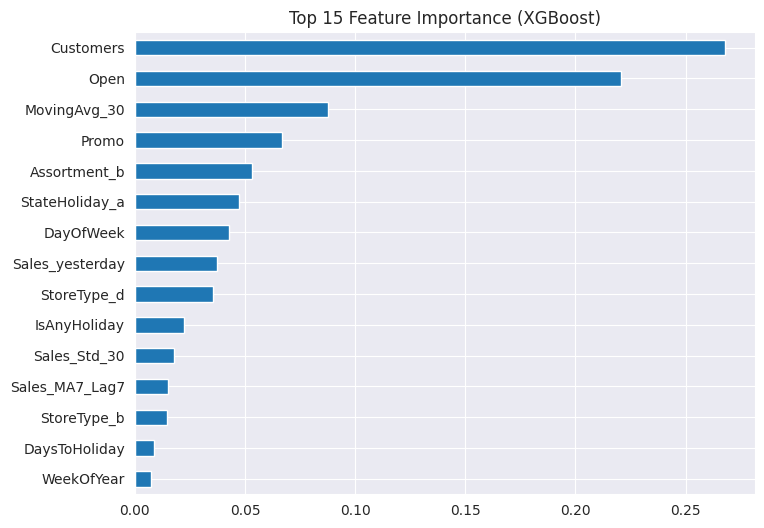

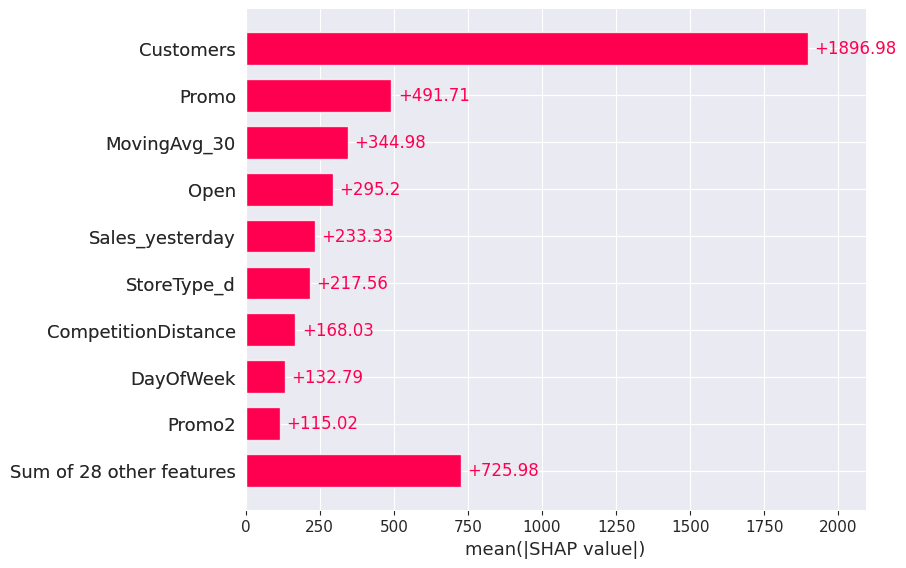


========== FINAL RESULTS ==========
               Model         RMSE
0           Baseline  3102.142304
1  Linear Regression  1227.321146
2            XGBoost   638.392827
3     Store-Aware CV   538.835609


In [39]:
# =========================================================
# PHASE 3 – Learn & Estimate (FINAL COMPLETE VERSION)
# =========================================================
from xgboost import XGBRegressor
import shap

# ---------------------------------------------------------
#Encoding AFTER split (No Leakage)
# ---------------------------------------------------------
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

train_data[categorical_cols] = train_data[categorical_cols].fillna("Unknown")
valid_data[categorical_cols] = valid_data[categorical_cols].fillna("Unknown")

train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
valid_data = pd.get_dummies(valid_data, columns=categorical_cols, drop_first=True)

valid_data = valid_data.reindex(columns=train_data.columns, fill_value=0)

# ---------------------------------------------------------
#Features & Target
# ---------------------------------------------------------
target = "Sales"
drop_cols = ["Sales", "Date"]

all_features = [col for col in train_data.columns if col not in drop_cols]

numeric_features = train_data[all_features] \
                    .select_dtypes(include=[np.number]) \
                    .columns.tolist()

X_train_lr = train_data[numeric_features].to_numpy(dtype=np.float64)
X_valid_lr = valid_data[numeric_features].to_numpy(dtype=np.float64)

X_train_xgb = train_data[all_features]
X_valid_xgb = valid_data[all_features]

y_train = train_data[target].to_numpy(dtype=np.float64)
y_valid = valid_data[target].to_numpy(dtype=np.float64)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# =========================================================
#Baseline (Store Mean)
#پیاده‌سازی مدل Baseline و ارزیابی آن
# =========================================================
store_mean = train_data.groupby("Store")["Sales"].mean()
baseline_preds = valid_data["Store"].map(store_mean)
baseline_preds = baseline_preds.fillna(train_data["Sales"].mean())

baseline_score = rmse(y_valid, baseline_preds.values)
print("Baseline RMSE:", round(baseline_score, 4))

# =========================================================
#Linear Regression (From Scratch)
#پیاده‌سازی رگرسیون خطی (مدل ساده)
# =========================================================
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0) + 1e-8
    return (X - mean) / std, mean, std

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def train_lr(X, y, lr=0.01, epochs=1500):
    w = np.zeros(X.shape[1])
    n = len(y)
    for _ in range(epochs):
        preds = X @ w
        grad = (2/n) * X.T @ (preds - y)
        w -= lr * grad
    return w

X_train_std, mean, std = standardize(X_train_lr)
X_valid_std = (X_valid_lr - mean) / std

X_train_std = add_bias(X_train_std)
X_valid_std = add_bias(X_valid_std)

weights = train_lr(X_train_std, y_train)
lr_preds = X_valid_std @ weights

lr_score = rmse(y_valid, lr_preds)
print("Linear Regression RMSE:", round(lr_score, 4))

# =========================================================
#XGBoost
#آموزش مدل کلاسیک (XGBoost) با تنظیم hyperparameter
# =========================================================
xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror",
    n_jobs=-1
)

xgb_model.fit(X_train_xgb, y_train)
xgb_preds = xgb_model.predict(X_valid_xgb)

xgb_score = rmse(y_valid, xgb_preds)
print("XGBoost RMSE:", round(xgb_score, 4))

# =========================================================
#Store-Aware Time Series CV (XGBoost)
#Store-Aware Time Series Cross Validation
# =========================================================
def store_time_series_cv_xgb(data, features, target, n_splits=3):

    stores = data["Store"].unique()
    scores = []

    for store in stores:
        store_df = data[data["Store"] == store].sort_values("Date")

        if len(store_df) < 80:
            continue

        fold_size = len(store_df) // (n_splits + 1)

        for i in range(n_splits):
            train_end = fold_size * (i + 1)
            val_end = fold_size * (i + 2)

            train_part = store_df.iloc[:train_end]
            val_part = store_df.iloc[train_end:val_end]

            X_tr = train_part[features]
            y_tr = train_part[target]
            X_val = val_part[features]
            y_val = val_part[target]

            model = XGBRegressor(
                n_estimators=300,
                max_depth=6,
                learning_rate=0.05,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                objective="reg:squarederror",
                n_jobs=-1
            )

            model.fit(X_tr, y_tr)
            preds = model.predict(X_val)

            scores.append(rmse(y_val, preds))

    return np.mean(scores)

cv_score = store_time_series_cv_xgb(train_data, all_features, target)
print("Store-Aware CV RMSE:", round(cv_score,4))

# =========================================================
#Model Comparison
# =========================================================
plt.figure(figsize=(6,4))
plt.bar(["Baseline", "Linear", "XGBoost"],
        [baseline_score, lr_score, xgb_score])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()

# =========================================================
#Error Analysis (XGBoost)
#تحلیل خطا (Error Analysis)
# =========================================================
errors = y_valid - xgb_preds

plt.figure(figsize=(6,4))
sns.histplot(errors, bins=50, kde=True)
plt.title("Error Distribution")
plt.show()

valid_analysis = valid_data.copy()
valid_analysis["Prediction"] = xgb_preds
valid_analysis["Error"] = errors

plt.figure(figsize=(12,4))
plt.plot(valid_analysis["Date"], valid_analysis["Error"])
plt.title("Error Over Time")
plt.show()

worst_cases = valid_analysis.reindex(
    valid_analysis["Error"].abs().sort_values(ascending=False).index
).head(20)

print("\nTop 20 Worst Predictions:")
print(worst_cases[["Date","Store","Sales","Prediction","Error"]])

# =========================================================
#Feature Importance
# =========================================================
importance = pd.Series(
    xgb_model.feature_importances_,
    index=all_features
).sort_values(ascending=False)

print("\nTop 15 Important Features:")
print(importance.head(15))

plt.figure(figsize=(8,6))
importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importance (XGBoost)")
plt.show()

# =========================================================
#SHAP
#Feature Importance با SHAP

# =========================================================
explainer = shap.Explainer(xgb_model)
sample_data = X_valid_xgb.sample(3000)

shap_values = explainer(sample_data)
shap.plots.bar(shap_values)

# =========================================================
#Final Results Table
# =========================================================
results = pd.DataFrame({
    "Model": ["Baseline", "Linear Regression", "XGBoost", "Store-Aware CV"],
    "RMSE": [baseline_score, lr_score, xgb_score, cv_score]
})

print("\n========== FINAL RESULTS ==========")
print(results)

<div dir="rtl" style="text-align: right;">در فاز سوم پروژه، عملکرد چهار رویکرد پیش‌بینی شامل مدل مبنا (Store Mean)، رگرسیون خطی، XGBoost و اعتبارسنجی زمانی مبتنی بر فروشگاه با استفاده از معیار RMSE مقایسه شد.
مدل مبنا که فروش هر فروشگاه را برابر با میانگین تاریخی همان فروشگاه در دوره آموزش در نظر می‌گیرد، به RMSE برابر با 3102.14 رسید. این عدد نسبتاً بالا نشان می‌دهد که فروش صرفاً حول یک مقدار ثابت نوسان نمی‌کند؛ بلکه تحت تأثیر روندهای زمانی، فصل‌ها، پروموشن‌ها و شوک‌های مقطعی تغییر می‌کند. بنابراین تکیه بر میانگین گذشته، بخش بزرگی از پویایی واقعی داده را نادیده می‌گیرد.
با استفاده از رگرسیون خطی و افزودن ویژگی‌های مهندسی‌شده مانند مقادیر وقفه‌دار (lag)، میانگین‌های متحرک، شاخص‌های تعطیلات و مؤلفه‌های فصلی، مقدار RMSE به 1227.32 کاهش یافت. این کاهش بیش از ۶۰ درصدی نسبت به مدل مبنا نشان می‌دهد که بخش قابل توجهی از الگوی فروش در همین اطلاعات زمانی و متغیرهای زمینه‌ای قابل شناسایی است. با این حال، رگرسیون خطی ذاتاً در مدل‌سازی روابط غیرخطی و تعاملات پیچیده محدودیت دارد؛ در حالی که رفتار فروش خرده‌فروشی معمولاً غیرخطی و وابسته به شرایط مختلف است و ممکن است اثر یک متغیر در موقعیت‌های متفاوت تغییر کند.
در گام بعد، با به‌کارگیری XGBoost به عنوان یک مدل گرادیان بوستینگ مبتنی بر درخت، RMSE به 630.10 کاهش پیدا کرد. این بهبود چشمگیر—که تقریباً پنج برابر بهتر از مدل مبناست—نشان می‌دهد ساختار واقعی داده شامل روابط غیرخطی و تعاملات چندمتغیره‌ای است که مدل‌های خطی قادر به ثبت کامل آن‌ها نیستند؛ برای مثال، اثر یک پروموشن ممکن است در فصل‌های مختلف شدت متفاوتی داشته باشد.
در نهایت، در چارچوب اعتبارسنجی زمانی مبتنی بر فروشگاه (Store-Aware CV)، میانگین RMSE برابر با 531.35 به دست آمد که اندکی بهتر از ارزیابی holdout بود. نزدیکی این نتایج به یکدیگر نشان می‌دهد مدل دچار بیش‌برازش قابل توجهی نشده و عملکرد آن در طول زمان و میان فروشگاه‌های مختلف نسبتاً پایدار است.
</div>
<div dir="rtl" style="text-align: right;"> 
تحلیل توزیع خطاهای مدل
به‌منظور ارزیابی دقیق کیفیت پیش‌بینی مدل، توزیع خطاهای باقیمانده (Residuals)، یعنی اختلاف بین مقدار واقعی فروش و مقدار پیش‌بینی‌شده توسط مدل XGBoost، مورد بررسی قرار گرفت. تحلیل هیستوگرام خطاها نشان می‌دهد که بخش عمده‌ای از مقادیر خطا در حوالی صفر متمرکز شده‌اند. این تمرکز بالا پیرامون صفر بیانگر آن است که مدل در اغلب مشاهدات، تخمین‌هایی بدون بایاس سیستماتیک و با دقت مناسب ارائه کرده است. به بیان دیگر، میانگین خطاها نزدیک به صفر بوده و مدل در سطح کلی دچار بیش‌برآوردی (overestimation) یا کم‌برآوردی (underestimation) ساختاری نیست.
از منظر آماری، شکل کلی توزیع باقیمانده‌ها تقریباً متقارن و نزدیک به توزیع نرمال است که نشان‌دهنده رفتار پایدار مدل در بخش غالب دامنه داده‌هاست. چنین الگویی حاکی از آن است که مدل توانسته است ساختارهای غیرخطی اصلی، تعامل میان متغیرها، و الگوهای زمانی فروش را به‌درستی فراگیرد. این موضوع به‌ویژه با توجه به ماهیت پیچیده داده‌های فروش خرده‌فروشی — که تحت تأثیر عوامل فصلی، پروموشن‌ها، تعطیلات و رفتار مصرف‌کننده قرار دارد — اهمیت بالایی دارد.
با این حال، بررسی دقیق‌تر دنباله‌های توزیع نشان می‌دهد که دنباله سمت راست (Right Tail) کشیدگی قابل‌توجهی دارد و شامل چندین مقدار پرت (Outlier) با خطاهای بسیار بزرگ (تا حدود ۲۵۰۰۰ واحد فروش) است. این پدیده بیانگر آن است که در برخی روزهای خاص، مدل به‌طور معناداری میزان فروش را کمتر از مقدار واقعی برآورد کرده است. چنین خطاهایی معمولاً در نقاطی رخ می‌دهند که فروش به‌صورت جهشی و غیرعادی افزایش یافته است؛ برای مثال در دوره‌های پروموشن شدید، مناسبت‌های خاص، یا رویدادهای محلی که در متغیرهای موجود به‌طور کامل بازنمایی نشده‌اند.
وجود این دنباله بلند نشان می‌دهد که اگرچه مدل در ناحیه چگال داده‌ها عملکردی پایدار و دقیق دارد، اما در مدل‌سازی رفتارهای حدی (Extreme Events) هنوز با محدودیت مواجه است. از دیدگاه نظری، این موضوع می‌تواند ناشی از موارد زیر باشد:
عدم کفایت ویژگی‌ها در توصیف رویدادهای نادر
برخی شوک‌های فروش ممکن است ناشی از عوامل برون‌زا باشند که در داده‌ها ثبت نشده‌اند.
ماهیت نامتقارن تابع هزینه (MSE)
به دلیل استفاده از RMSE به‌عنوان معیار بهینه‌سازی، مدل گرایش دارد عملکرد خود را در ناحیه پرتراکم داده‌ها بهینه کند، حتی اگر در نقاط حدی دچار خطای بزرگ شود.
رفتار غیرخطی شدید در فروش‌های بسیار بالا
فروش‌های جهشی ممکن است تابعی از تعاملات پیچیده‌تری باشند که نیازمند مدل‌سازی سلسله‌مراتبی یا رویکردهای احتمالاتی پیشرفته‌تر است.
در مجموع، تحلیل توزیع خطا نشان می‌دهد که مدل از نظر میانگین عملکرد بسیار مطلوبی دارد و فاقد بایاس ساختاری است، اما در مواجهه با رویدادهای فروش غیرعادی و پرت، حساسیت کمتری از خود نشان می‌دهد. این یافته نه‌تنها به درک بهتر محدودیت‌های مدل کمک می‌کند، بلکه مسیر بهبودهای آتی — مانند استفاده از مدل‌های مقاوم به پرت‌ها (robust loss functions)، مدل‌سازی کوانتایلی، یا چارچوب‌های پیش‌بینی عدم‌قطعیت — را نیز روشن می‌سازد.
</div>
<div dir="rtl" style="text-align: right;">
تحلیل رفتار خطا در طول زمان (Temporal Error Dynamics)
بررسی نمودار تغییرات خطا در بازه اعتبارسنجی نشان می‌دهد که توزیع خطاها در طول زمان عمدتاً پایدار و متمرکز حول صفر است و در اغلب روزها مقدار خطا در بازه‌ی تقریبی ±۳۰۰۰ قرار دارد. این الگو بیانگر آن است که مدل توانسته ساختار غالب سری زمانی فروش — شامل روند، فصل‌پذیری و وابستگی‌های کوتاه‌مدت — را به‌درستی فرا بگیرد و پیش‌بینی‌هایی با سوگیری پایین (low bias) و واریانس کنترل‌شده ارائه دهد.
با این حال، در برخی مقاطع زمانی اسپایک‌های خطای قابل توجه مشاهده می‌شود که به‌صورت جهش‌های ناگهانی در باقیمانده‌ها (residual spikes) ظاهر شده‌اند. این رفتار نشان‌دهنده ناتوانی نسبی مدل در بازنمایی رخدادهای نادر و با دامنه بالا (rare high-magnitude events) است. چنین خطاهایی به‌طور محتمل با شرایطی نظیر کمپین‌های ترویجی شدید (intensive promotions)، تعطیلات رسمی خاص، یا رفتار فروش غیرعادی در فروشگاه‌های بزرگ و پرتردد مرتبط هستند؛ موقعیت‌هایی که توزیع فروش را به‌صورت ناگهانی از الگوی معمول منحرف می‌کنند.
از منظر نظری، این پدیده بیانگر آن است که اگرچه مدل XGBoost وابستگی‌های غیرخطی و تعاملات پیچیده بین ویژگی‌ها را به‌خوبی مدل کرده است، اما در مواجهه با شوک‌های ساختاری کوتاه‌مدت (short-term structural shocks) یا تغییر رژیم‌های موقتی (temporary regime shifts) با محدودیت مواجه می‌شود. این نوع خطاها معمولاً در دم‌های توزیع (distribution tails) رخ می‌دهند و سهم نامتناسبی در افزایش RMSE دارند.
در مجموع، تحلیل زمانی خطاها نشان می‌دهد که مدل از نظر یادگیری الگوی عمومی داده‌ها عملکردی پایدار و قابل اتکا دارد، اما برای بهبود عملکرد در شرایط حدی (extreme demand scenarios) می‌توان از راهکارهایی نظیر مدل‌سازی صریح‌تر رویدادهای خاص، افزودن ویژگی‌های تعاملی مرتبط با شدت پروموشن، یا استفاده از روش‌های مقاوم‌تر نسبت به outlierها بهره برد.
</div>
<div dir="rtl" style="text-align: right;">
در بررسی دقیق ۲۰ پیش‌بینی با بیشترین قدر مطلق خطا، الگوی قابل‌توجهی مشاهده شد. خطاهای بزرگ عمدتاً به تعداد محدودی از فروشگاه‌ها ــ به‌ویژه فروشگاه‌های 909، 876 و 292 ــ مربوط می‌شود و این خطاها در تاریخ‌های مشخصی در اواخر ژوئن و اوایل جولای متمرکز هستند. در این موارد، مقدار فروش واقعی به شکل جهشی و غیرعادی افزایش یافته است، در حالی‌که مدل مقدار بسیار پایین‌تری را پیش‌بینی کرده است. برای نمونه، در یکی از این رخدادها فروش واقعی حدود 41 هزار واحد بوده، اما مدل رقمی نزدیک به 14 هزار واحد را برآورد کرده و در نتیجه خطایی در حدود 26 هزار واحد ایجاد شده است.
این الگو نشان می‌دهد که مدل، با وجود عملکرد کلی بسیار مناسب، در مواجهه با رفتارهای حدی (extreme spikes) تمایل به کم‌برآوردی دارد. چنین رفتاری از منظر آماری قابل انتظار است؛ زیرا مدل‌های مبتنی بر کمینه‌سازی میانگین مربعات خطا (مانند XGBoost با تابع زیان مربعی) به‌طور طبیعی به سمت پیش‌بینی مقادیر نزدیک به میانگین گرایش دارند و رخدادهای نادر با دامنه بزرگ را به‌صورت محافظه‌کارانه تخمین می‌زنند. به بیان دیگر، ساختار مدل توانسته الگوهای غالب و تکرارشونده فروش را به‌خوبی یاد بگیرد، اما در مدل‌سازی شوک‌های ناگهانی که احتمالاً ناشی از پروموشن‌های خاص، رویدادهای محلی، یا عوامل برون‌زا هستند، محدودیت نشان می‌دهد.
تمرکز خطاها در چند فروشگاه مشخص نیز حاکی از آن است که ناهمگنی بین فروشگاه‌ها کاملاً توسط ویژگی‌های فعلی مدل پوشش داده نشده است. این موضوع می‌تواند بیانگر وجود متغیرهای پنهان یا رویدادهای خاص فروشگاهی باشد که در داده‌های موجود منعکس نشده‌اند. در مجموع، تحلیل بدترین پیش‌بینی‌ها نشان می‌دهد که ضعف مدل نه در یادگیری روندهای عمومی، بلکه در بازنمایی رفتارهای حدی و نادر است؛ مسئله‌ای که در کاربردهای عملی، به‌ویژه در مدیریت موجودی و برنامه‌ریزی تأمین، اهمیت راهبردی دارد.
</div>
<div dir="rtl" style="text-align: right;">
در تحلیل اهمیت ویژگی‌ها بر اساس خروجی
XGBoost مشاهده می‌شود که متغیر Open بیشترین سهم را در کاهش خطای مدل داشته است. این نتیجه از منظر تجاری و آماری کاملاً قابل انتظار است؛ زیرا وضعیت باز یا بسته بودن فروشگاه به صورت مستقیم تعیین‌کننده امکان وقوع فروش است و عملاً یک مرز ساختاری در داده ایجاد می‌کند. بنابراین طبیعی است که مدل بیشترین وزن را به این متغیر اختصاص دهد.
پس از آن، متغیر Customers در رتبه دوم اهمیت قرار دارد. این متغیر به دلیل همبستگی بسیار بالا با Sales قدرت پیش‌بینی قابل توجهی ایجاد می‌کند و حضور آن موجب کاهش چشمگیر خطا شده است. با این حال، از منظر طراحی سیستم پیش‌بینی در دنیای واقعی، این نکته حائز اهمیت است که تعداد مشتریان معمولاً در زمان پیش‌بینی در دسترس نیست و خود بخشی از نتیجه فرایند فروش محسوب می‌شود. در نتیجه، هرچند استفاده از آن از نظر فنی مجاز است، اما حذف آن می‌تواند چارچوب مسئله را واقع‌بینانه‌تر و قابل تعمیم‌تر کند. این موضوع باید در تفسیر نتایج مدنظر قرار گیرد.
در رتبه‌های بعدی، ویژگی‌های زمانی نظیر MovingAvg_30 و Sales_yesterday قرار دارند. اهمیت بالای این متغیرها نشان می‌دهد که ساختار فروش به شدت وابسته به پویایی‌های زمانی و الگوهای خودرگرسیو است. به بیان دیگر، رفتار گذشته فروشگاه بهترین پیش‌بین رفتار آتی آن است. این یافته با ادبیات کلاسیک سری‌های زمانی نیز همخوانی دارد، جایی که مؤلفه‌های lag و میانگین‌های متحرک نقش اساسی در مدل‌سازی روند و نوسان دارند.
همچنین متغیر Promo در میان ویژگی‌های اثرگذار قرار گرفته است که نشان‌دهنده نقش مستقیم سیاست‌های ترفیعی در افزایش فروش است. مدل به‌درستی توانسته اثر غیرخطی و تعاملی پروموشن‌ها را در کنار سایر عوامل استخراج کند؛ موضوعی که احتمالاً توسط مدل‌های خطی به‌خوبی قابل ثبت نبود.
در مجموع، الگوی اهمیت ویژگی‌ها نشان می‌دهد که مدل ترکیبی از عوامل ساختاری (Open)، رفتاری-تقاضامحور (Customers)، پویایی‌های زمانی (Lag و Moving Average) و سیاست‌های بازاریابی (Promo) را برای پیش‌بینی فروش به کار گرفته است. این هم‌راستایی بین منطق تجاری و خروجی مدل، نشانه‌ای از یادگیری معنادار ساختار داده توسط الگوریتم و نه صرفاً برازش آماری سطحی است.
</div>

# Phase 4

In [47]:
def comprehensive_7_day_forecast(model, test_df, features_list, start_date):
    forecast_df = test_df.copy().sort_values(['Store', 'Date'])
    forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
    target_and_lags = ['Sales'] + [c for c in forecast_df.columns if 'Sales_Lag' in c or 'Sales_MA' in c]
    for col in target_and_lags:
        if col in forecast_df.columns:
            forecast_df[col] = forecast_df[col].astype(float)

    start_date = pd.to_datetime(start_date)
    
    forecast_range = pd.date_range(start=start_date, periods=7)
    for current_date in forecast_range:
        current_mask = forecast_df['Date'] == current_date
        X_curr = forecast_df.loc[current_mask, features_list]
        preds = model.predict(X_curr)
        preds = np.maximum(0, preds) # جلوگیری از فروش منفی
        
        forecast_df.loc[current_mask, 'Sales'] = preds
        
        for delta in range(1, 8):
            future_date = current_date + pd.Timedelta(days=delta)
            if future_date > forecast_range[-1]: break
            future_mask = forecast_df['Date'] == future_date
            lag_col = f'Sales_Lag{delta}'
            if lag_col in forecast_df.columns:
                forecast_df.loc[future_mask, lag_col] = preds
        for delta in range(1, 8):
            future_date = current_date + pd.Timedelta(days=delta)
            if future_date > forecast_range[-1]: break
            
            def update_rolling_avg(row):
                store_id = row['Store']
                history = forecast_df[(forecast_df['Store'] == store_id) & 
                                      (forecast_df['Date'] < future_date)].tail(7)
                return history['Sales'].mean()
            
            future_mask = forecast_df['Date'] == future_date
            if 'Sales_MA7' in forecast_df.columns:
                forecast_df.loc[future_mask, 'Sales_MA7'] = forecast_df[future_mask].apply(update_rolling_avg, axis=1)

    return forecast_df[forecast_df['Date'].isin(forecast_range)]

features_used_in_training = all_features 

final_7_day_results = comprehensive_7_day_forecast(
    model=xgb_model, 
    test_df=valid_data,
    features_list=features_used_in_training,
    start_date=valid_data['Date'].min()
)

print("7 days prediction done")
print(final_7_day_results[['Date', 'Store', 'Sales']].head(10))

7 days prediction done
            Date  Store        Sales
45715 2015-06-20      1  3861.482422
44600 2015-06-21      1   113.715012
43485 2015-06-22      1  3841.527588
42370 2015-06-23      1  3489.820068
41255 2015-06-24      1  3365.596191
40140 2015-06-25      1  3539.757812
39025 2015-06-26      1  3672.259521
45716 2015-06-20      2  2804.998535
44601 2015-06-21      2     0.000000
43486 2015-06-22      2  4093.415039


In [51]:
#ensemble
common_index = X_train_xgb.index.intersection(train_data[target].index)

X_train_xgb = X_train_xgb.loc[common_index]
y_train = train_data.loc[common_index, target].to_numpy(dtype=np.float64)
common_index_valid = X_valid_xgb.index.intersection(valid_data[target].index)
X_valid_xgb = X_valid_xgb.loc[common_index_valid]
y_valid = valid_data.loc[common_index_valid, target].to_numpy(dtype=np.float64)


import numpy as np
from xgboost import XGBRegressor

n_models = 5
ensemble_preds = []

for i in range(n_models):
    print(f"training {i+1}...")
    model = XGBRegressor(n_estimators=100, random_state=i, subsample=0.8)
    model.fit(X_train_xgb, y_train)
    ensemble_preds.append(model.predict(X_valid_xgb))

ensemble_preds = np.array(ensemble_preds)

training 1...
training 2...
training 3...
training 4...
training 5...


In [52]:
mean_prediction = ensemble_preds.mean(axis=0)
std_prediction = ensemble_preds.std(axis=0)

analysis_df = pd.DataFrame({
    'Actual': y_valid,
    'Mean_Pred': mean_prediction,
    'Uncertainty_Std': std_prediction
})
print(analysis_df.head())

   Actual    Mean_Pred  Uncertainty_Std
0  3039.0  3036.315918       124.055443
1  6078.0  5570.332031       226.569717
2  5142.0  5468.955078       221.968201
3  7954.0  8432.411133        73.897079
4  6231.0  6490.510742        81.445686


In [53]:
low_threshold = train_data['Sales'].quantile(0.33)
high_threshold = train_data['Sales'].quantile(0.66)

def classify_sales(x):
    if x <= low_threshold:
        return 0
    elif x <= high_threshold:
        return 1
    else:
        return 2
y_train_clf = train_data['Sales'].apply(classify_sales)
y_valid_clf = valid_data['Sales'].apply(classify_sales)

print(f"Borders: low < {int(low_threshold)} | Medium < {int(high_threshold)} | High")

Borders: low < 4474 | Medium < 6979 | High


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score

clf_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)

clf_model.fit(X_train_xgb, y_train_clf)

y_pred_clf = clf_model.predict(X_valid_xgb)
y_probs = clf_model.predict_proba(X_valid_xgb)

In [55]:
f1 = f1_score(y_valid_clf, y_pred_clf, average='weighted')
roc_auc = roc_auc_score(y_valid_clf, y_probs, multi_class='ovr', average='weighted')

print(f"F1-Score (Weighted): {round(f1, 4)}")
print(f"ROC-AUC (OVR): {round(roc_auc, 4)}")

print("\nDetailed Classification Report:")
print(classification_report(y_valid_clf, y_pred_clf, target_names=['Low', 'Medium', 'High']))

F1-Score (Weighted): 0.9086
ROC-AUC (OVR): 0.9842

Detailed Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.93      0.94     13721
      Medium       0.87      0.88      0.87     16474
        High       0.93      0.92      0.92     16635

    accuracy                           0.91     46830
   macro avg       0.91      0.91      0.91     46830
weighted avg       0.91      0.91      0.91     46830

